# Contents

[3 ¿Qué vende un coche?](#3)

* [3.1 Inicialización ](#3.1)
    * [3.1.1 Cargar datos ](#3.1.1)
    * [3.1.2 Explorar datos iniciales](#3.1.2)
    * [3.1.3 Conclusiones y siguientes pasos](#3.1.3)
    
[3.2 Tratar los valores ausentes (si hay) ](#3.2)

[3.3 Corregir los tipos de datos ](#3.3)

[3.4 Enriquecer datos  ](#3.4)

[3.5 Comprobar datos limpios  ](#3.5)

[3.6 Estudiar parámetros principales ](#3.6)

[3.7 Estudiar y tratar valores atípicos ](#3.7)

[3.8 Estudiar parámetros principales sin valores atípicos ](#3.8)

[3.9 Periodo de colocación de los anuncios ](#3.9)

[3.10 Precio promedio por cada tipo de vehículo](#3.10)

[3.11 Factores de precio  ](#3.11)

[3.12 Conclusión general ](#3.12)



# ¿Qué vende un coche? <a id='3'></a>

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Objetivos:
* Estudiar los siguientes parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindros y condición
* Comparar gráficamente usando histogramas de los datos sin excluir los valores atípicos vs los datos excluyendo los valores atípicos
* Determinar cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo a través del uso de la mediana y media en el histograma.
* Analizar el número de anuncios y el precio medio para cada tipo de vehículo
* Determinar que factores impactan más sobre el precio de un vehículo a través de gráficos de diagramas de caja y dispersión.

## Inicialización

Cargaremos las librerias de pandas para la manipulación y tratamiento de los datos, la librería de mayplotlib para poder crear y generar nuestros propios gráficos que serán de utilidad para la visuaización de los datos junto con seaborn y statistics para el uso de la moda.

In [1]:
# Cargar todas las librerías
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

from statistics import mode


### Cargar datos

Cargaremos los datos del proyecto y observamos la información general.

In [2]:
df= pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



Explóraremos los datos para poder familiarizarnos e imprimiremos las primeras 20 filas del DataFrame.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.head(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


En el DataFrame observamos que tenemos nuestro conjunto de datos está distribuido en 13 columnas y 51.525 filas. 

Hay valores ausentes en 5 columnas: model_year, cylinder, odometer, paint_color y la columna con mayor numero de valores ausentes es:  is_4wd. El número de valores ausentes en las columnas no son simétricos entre ellos por lo que sería un punto que más adelante se podría investigar sin son aleatorios o no. 

Existen columnas con tipos de datos inapropiados de acuerdo a la información que observamos en la muestra de las primeras 20 columnas. Por ejemplo: cylinder, odometer son tipos de dato númericos enteros pero se encuentra como float, adicional: is_4wd es un tipo de dato booleano y se encuentra como float y  date_type es un tipo de dato de fecha, pero esta registrado como object. Para model_year es un tipo de dato discreto por lo que debería estar como object, pero aparece como float.

Más adelante se realizarán estas modificaciones en el tipo de datos de las columnas mencionadas anteriormente para que esten en el formato adecuado para nuestro análisis.

### Conclusiones y siguientes pasos



Existen valores ausentes no simétricos entre las columnas y es un punto importante investigar con que otras características pueden estar relacionados y encontrar el estadístico adecuado para imputar los valores ausentes si se requiere, por el otro lado si los valores ausentes son significativos tendremos que dejarlo en blanco para no alterar los resulados y el análisis. 

Los valores ausentes de la columna is_4wd serán más fáciles de completar, dado que corresponde a un tipo de dato booleano ya que solo se tiene completo el 1 que indica Verdadero. 

Cambiaremos los tipos de datos de las 5 columnas: model_year, cylinder, odometer,date_type y is_4wd al formato que corresponde según la característica de la columna. 


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen trabajo. Esto nos permite establecer una ruta de trabajo clara.
</div>

## Tratar los valores ausentes (si hay)

Estudiaremos los valores ausentes para cada columna en detalle y veremos la distribución entre las otras características y asi poder establecer hipótesis significativas en la ausencia de los datos.
Antes considero importante identificar que tipo de dato corresponde a cada columna con valores ausentes, es decir si son númericos o categóricos para determinar de mejor manera las relaciones con las demás características.

is-4wd: categórica 

paint_clor: categórica 

model_year: numérica 

cylinders: numérica 

odometer: numérica 




Empezaremos con la columna: is_4wd para saber el porcentaje de valores ausentes para después tratarlo como una variable booleana.

In [5]:
v_a_is=df['is_4wd'].isna().sum()
v_t_is= len(df['is_4wd'])
print(f'Valores ausentes: {v_a_is/v_t_is:.0%}')

Valores ausentes: 50%


Cambiaremos los valores ausentes a 0 los cuales indican que el carro no tiene tracción las 4 ruedas y los 1 que sí lo tienen. Más adelante en la sección de corregir los tipos de datos cambiaremos esta variable a tipo booleano.

In [6]:
df['is_4wd']= df['is_4wd'].fillna(0)
df['is_4wd']   
    


0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

La siguiente columna es: paint_color

In [7]:
v_a_paint=df['paint_color'].isna().sum()
v_t_paint= len(df['paint_color'])
print(f'Valores ausentes: {v_a_paint/v_t_paint:.0%}')

Valores ausentes: 18%


Tenemos un 18% de valores ausentes, dado que son aproximadamente 9000 registros para rellenarlos los clasificaremos como "others". 

In [8]:
df['paint_color']= df['paint_color'].fillna('others')
print(df['paint_color'].value_counts())

white     10029
others     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


Continuamos con la columna: model_year 

In [9]:
model_year_va=df['model_year'].isna().sum()
v_t_my=len(df['model_year'])
print(f'Valores ausentes: {model_year_va/v_t_my:.0%}')

Valores ausentes: 7%


Encontramos que model_year tiene un 7% de datos ausentes, por lo que vamos a relacionar los estadísticos con las otras variables del conjunto de datos que pueden haber infuido en los valores ausentes. Primero realizaremos un histograma para ver la distribución de los años de los modelos de carros y su frecuencia.

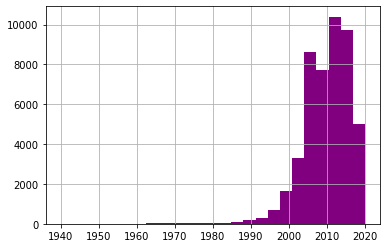

In [10]:
hist_model_year= df['model_year'].hist(grid=True,bins=25, range=(1940,2020),color='purple')

Podemos obervar que hay un pico entre modelos de carros de los años 2010-2013 aproximadamente. Es decir que el negocio está promocionando la mayoría de modelos de carros que esten entre los años 2005-2018.
Sin embargo la frecuencia es menor para los años por debajo de 1998, se podría concluir que la mayoría de carros que se enfocan en promocionar son dentro de los últimos 15 años y se enfocan al mínimo el nicho de carros clásicos. 

Utilizaremos la matriz de correlación entre las variables numéricas para osbervar si existe dependecia o no entre cada una de ellas.

In [11]:
print(df.corr())

                price  model_year  cylinders  odometer    is_4wd  days_listed
price        1.000000    0.428656   0.296627 -0.420299  0.315145    -0.000682
model_year   0.428656    1.000000  -0.148040 -0.473948  0.043384    -0.005703
cylinders    0.296627   -0.148040   1.000000  0.090160  0.405770     0.005517
odometer    -0.420299   -0.473948   0.090160  1.000000  0.036267     0.003804
is_4wd       0.315145    0.043384   0.405770  0.036267  1.000000     0.002003
days_listed -0.000682   -0.005703   0.005517  0.003804  0.002003     1.000000


Encontramos que la matriz que incluye a todos los valores ausentes, las correlaciones más significaticas que se pueden rescatar son las de: precio vs model_year, precio vs odometer y model_year vs odometer. Estos valores indican que si implica una conexión entre ellos pero no sabemos nada sobre la causa y el efecto.

Intetaremos probar de nuevo con 2  matrices más: sin tomar en cuenta los valores ausentes de la columna de model_year y contemplando los valores ausentes también.

In [12]:
m_y_no_va= df.dropna(subset=['model_year']) #Sin valores ausentes

In [13]:
m_y_va=df[(df['model_year'].isna())] # Con valores ausentes

In [14]:
print(m_y_no_va.corr())

                price  model_year  cylinders  odometer    is_4wd  days_listed
price        1.000000    0.428656   0.295579 -0.419144  0.316981    -0.002436
model_year   0.428656    1.000000  -0.148040 -0.473948  0.043384    -0.005703
cylinders    0.295579   -0.148040   1.000000  0.089742  0.404200     0.002502
odometer    -0.419144   -0.473948   0.089742  1.000000  0.034674     0.004162
is_4wd       0.316981    0.043384   0.404200  0.034674  1.000000     0.001971
days_listed -0.002436   -0.005703   0.002502  0.004162  0.001971     1.000000


In [15]:
print(m_y_va.corr())

                price  model_year  cylinders  odometer    is_4wd  days_listed
price        1.000000         NaN   0.311333 -0.436723  0.290371     0.023821
model_year        NaN         NaN        NaN       NaN       NaN          NaN
cylinders    0.311333         NaN   1.000000  0.096352  0.426410     0.045047
odometer    -0.436723         NaN   0.096352  1.000000  0.057609    -0.000630
is_4wd       0.290371         NaN   0.426410  0.057609  1.000000     0.002469
days_listed  0.023821         NaN   0.045047 -0.000630  0.002469     1.000000


Podemos observar que no hubieron cambios drásticos en las correlaciones de las variables. 
Las únicas diferencias es que retirando los valores ausentes de model_year, la variable de precio vs cylinders y precio vs odometer se hacen ligeramente más fuertes. 



<AxesSubplot:title={'center':'Grafico de dispersión entre el año de modelo y el precio'}, xlabel='model_year', ylabel='price'>

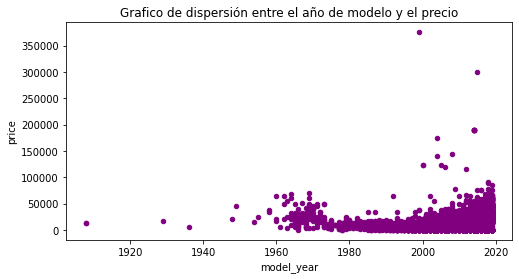

In [16]:
m_y_no_va.plot(x='model_year',y='price', kind='scatter',title='Grafico de dispersión entre el año de modelo y el precio',figsize=(8,4),color='purple')

Revsado la gráfica de dispersión entre los datos no ausentes de model_year y el precio, se observa que si tiene una tendencia ligera a que a medida que aumenten los años el precio aumenta, pero no es para todos los casos y además exisen valores atípicos en el precio que nos pueden distorcionar la realidad. La correlación de  -0.43 no necesariamente indica que existe una relación lineal marcada, por lo que seguiremos revisando y comparando con las demás características categóricas.

A continuación se observará la distribución y relación que existe de los valores ausentes de model year en las variables de: tipo de carro y modelo que son las caracterísiticas que más podemos relacionar con el año del modelo.

<AxesSubplot:title={'center':'Frecuencia_ Tipo de carro'}>

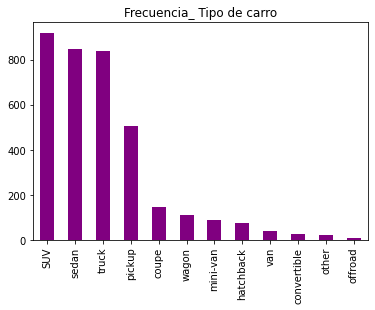

In [17]:
m_y_va['type'].value_counts().plot(kind='bar',title='Frecuencia_ Tipo de carro',color='purple')

In [18]:
m_y_va['model'].value_counts()

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
chevrolet silverado 3500hd            14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

Podemos interpretar que los tipos de carro SUV,sedan y truck que son modelos de:ford, chevrolet silverado 1500 y ram 1500 son los que predominan en su frecuencia, por lo que son variables que juntas nos pueden llevar a tener un estimado del año del modelo. 

A continuación realizaremos una tabla dinámica sin los valores ausentes de model_year para concoer cual es el año que más se repite por tipo y modelo de carro para la imputación de los mismos.

In [29]:
m_y_no_va= df.dropna(subset=['model_year'])
pivotmy= m_y_no_va.pivot_table(index=['model','type'],values='model_year',aggfunc=mode)
pivotmy

model_year
model             type                 
acura tl          SUV            2007.0
                  other          2004.0
                  sedan          2005.0
bmw x5            SUV            2012.0
                  hatchback      2001.0
...                                 ...
volkswagen passat coupe          2014.0
                  hatchback      2008.0
                  other          2014.0
                  sedan          2013.0
                  wagon          2008.0

[477 rows x 1 columns]

Realizaremos una fórmula para reemplazar los valores ausentes por la moda.

In [30]:
def completar_va_my(row):
    
    model_year= row['model_year']
    model= row['model']
    type1= row['type']

         
                   
    if pd.isna(model_year):
        return pivotmy['model_year'][model][type1]



    return model_year

En la fila 879 en model_year teníamos un valor ausente y las características del modelo era bmw x5 y el tipo SUV. De acuerdo a nuestra tabla dinámica debería darnos el año 2012.

In [31]:
completar_va_my(df.iloc[879])

2012.0

Aplicaremos la función al DataFrame y utilizaremos try y except para comprobar si funciona.

In [34]:
row_values= ['chevrolet cruze','SUV',float('nan')]
row_columns= ['model','type','model_year']
row = pd.Series(data=row_values, index= row_columns)
print(completar_va_my(row))

2012.0


In [35]:
try:
    df['model_year']= df.apply(completar_va_my, axis=1)
    
except:
    print('Error de función')

En la fia 1 teníamos un valor ausente y podemos ver que ya ha sido completado.

In [36]:
df.iloc[1]

price                25500
model_year          2013.0
model           ford f-150
condition             good
cylinders              6.0
fuel                   gas
odometer           88705.0
transmission     automatic
type                pickup
paint_color          white
is_4wd                 1.0
date_posted     2018-10-19
days_listed             50
Name: 1, dtype: object

Imprimeremos la información del conjunto de datos para revisar que no tengamos ningún valor ausente en model_year

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo en esta variable, Sara.
</div>

Continuaremos con la columna: cylinders. Dado que en nuestra primera matriz de correlación no observamos relaciones significativas con las variables númericas, probaremos con las variables: fuel y transmission.

Primero realizaremos un histograma para concer que número de cilindros son los que más se repiten.

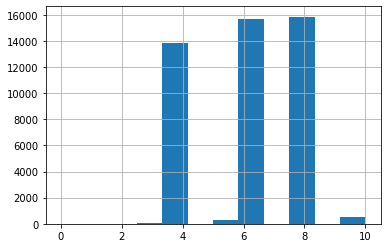

In [38]:
hist_cylinder= df['cylinders'].hist(grid=True,bins=12, range=(0,10))

Los carros que tienen 4, 6 y 8 cilindros son los más comunes, por lo que se puede deducir que los fabricantes de carros hacen en mayor proporción carros con este número de cilindros considerado como un número estándar o común.

In [39]:
c_va=df[(df['cylinders'].isna())]
pivot_c=c_va.pivot_table(index=['transmission','fuel'],values='type',aggfunc='count')
pivot_c

type
transmission fuel          
automatic    diesel     357
             electric     2
             gas       4374
             hybrid      39
             other       10
manual       diesel      16
             gas        290
other        diesel       5
             gas        162
             other        5

En la tabla podemos encontrar una característica en común y notoria en cuánto a los valores ausentes de los cilindros, y es que predominan más los carros que son de gasolina y automáticos. Podrían ser variables que podríamos usar en conjunto para reemplazar los valores ausentes. 
Dado que no hay valores atípicos en el número de cilindros podríamos imputar con el estadísitico de la moda.




In [40]:
c_no_va=df.dropna(subset=['cylinders'])
pt= c_no_va.pivot_table(index=['transmission','fuel'],values= 'cylinders',aggfunc=mode)
pt

cylinders
transmission fuel               
automatic    diesel          8.0
             electric       10.0
             gas             6.0
             hybrid          4.0
             other           8.0
manual       diesel          6.0
             gas             4.0
             hybrid          4.0
             other           8.0
other        diesel          6.0
             gas             6.0
             hybrid          4.0
             other           8.0

In [41]:
pt['cylinders']['automatic']['gas']

6.0

Crearemos una función para completar los valores ausentes, con el promedio del cilindro basado en su tramisión y según el tipo de combustible.

In [42]:
def completar_va(row):
    transmission = row['transmission']
    cylinders= row['cylinders']
    fuel= row['fuel']
    
    if pd.isna(cylinders):
        return pt['cylinders'][transmission][fuel]
    return cylinders

Dado que tenemos un valor ausente en la fila 9, comprobaremos con ese indice si funciona la fórmula.

In [43]:
completar_va(df.iloc[9])

6.0

Aplicaremos la función para cada fila

In [44]:
row_values= ['automatic','gas', float('nan')]
row_columns= ['transmission','fuel','cylinders']
row = pd.Series(data=row_values, index= row_columns)
print(completar_va(row))

6.0


Para asegurarnos que la función va a ejecutarse o si hay algún error utilizaremos try and except.

In [45]:
try:
    df['cylinders']= df.apply(completar_va,axis=1)
except: 
    print('Error de función')

Parece que funciona bien. Asi que comprobaremos con la fila 36 que tambien tenía un valor ausente en cylinders, ahora nos debería aparecer el valor de la tabla dinámica según sus 2 características.

In [46]:
df.iloc[36]

price                  10499
model_year            2013.0
model           chrysler 300
condition               good
cylinders                6.0
fuel                     gas
odometer             88042.0
transmission       automatic
type                   sedan
paint_color           others
is_4wd                   0.0
date_posted       2018-05-05
days_listed               22
Name: 36, dtype: object

Para este índice el tipo de combustión del carro es gasolina y es automático por lo que el reemplazo en los cilindros debe ser de 6. Más adelante en la sección de cambiar tipo de datos realizaremos las modificaciones en esta columna para dejar en un formato de número entero.

Imprimeremos las primeras 10 filas del DataFrame.

In [47]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,others,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Continuamos con la columna: odometer. Añadiremos la tabla de correlación para los valores no ausentes de esta columna y compararemos con las demás variables. 



In [48]:
o_no_va=df.dropna(subset=['odometer'])
print(o_no_va.corr())

                price  model_year  cylinders  odometer    is_4wd  days_listed
price        1.000000    0.411776   0.291492 -0.420299  0.318415     0.000424
model_year   0.411776    1.000000  -0.133803 -0.457169  0.042040    -0.006285
cylinders    0.291492   -0.133803   1.000000  0.087370  0.386508     0.008581
odometer    -0.420299   -0.457169   0.087370  1.000000  0.036267     0.003804
is_4wd       0.318415    0.042040   0.386508  0.036267  1.000000     0.003221
days_listed  0.000424   -0.006285   0.008581  0.003804  0.003221     1.000000


Dado que observamos que existe una correlación negativa con el precio de -0.42, añadiremos un gráfico de dispersión entre estas 2 variables para una mejor visualización.

<AxesSubplot:title={'center':'Grafico de dispersión entre el millaje y el precio'}, xlabel='odometer', ylabel='price'>

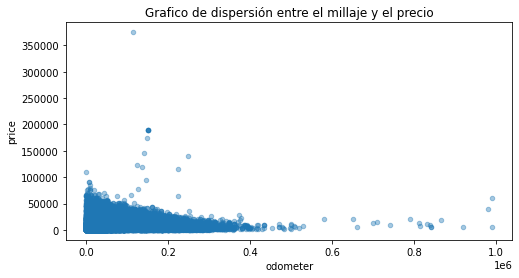

In [49]:
o_no_va=df.dropna(subset=['odometer'])
o_no_va.plot(x='odometer',y='price', kind='scatter',title='Grafico de dispersión entre el millaje y el precio',figsize=(8,4),alpha=0.4)

El gráfico principalmente indica una tendencia inversa, que a medida que el millaje del carro sea mayor el precio será menor. Lo que corresponde a un argumento lógico a medida que un carro tiene mayor kilometraje transcurrido su precio será menor, pero nuevamente observamos los valores atípicos que existen en precios muy por encima y tambien hay carros que tiene el máximo millaje recorrido y aun así su precio no es el más bajo.

Un factor que puede influir en la variable del odometer es la condición en la que se encuentra el carro. 
Es decir que un carro que sea como nuevo es probable que tenga un menor recorrido en millas, y lo mismo al contrario si el carro esta en condiciones para rescate se puede dar a que su recorrido en millas es mayor. 
A continuación utilizaremos un gráfico de la librería seasborn para observar la distribución.

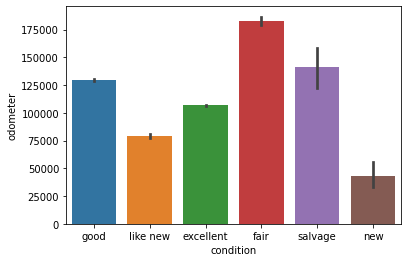

In [50]:
sns.barplot(data=o_no_va,x='condition', y='odometer')
plt.show()

Con este gráfico podemos comprobar que se obedece a la tendencia de que los carros nuevos son los que tienen un menor recorrido. 
Esta característica es la que más se ajusta para completar los valores ausentes de odometer, realizaremos una tabla dinámica para llamar al estadístico de la mediana y media para comparar los valores.

In [51]:
pivot_o_no_va= o_no_va.pivot_table(index='condition',values='odometer',aggfunc=['median','mean'])
pivot_o_no_va

,median,mean
,odometer,odometer
condition,,
excellent,104230.0,106687.682258
fair,181613.0,183062.233577
good,129000.0,129919.930980
like new,72982.5,79426.738166
new,8002.0,43476.056000
salvage,142673.5,140919.989796


Podemos observar que los valores de media y mediana por cada condición no existe una gran brecha, con excepción de la condición de nuevo con un diferencia de 35.000 millas aproximadamente, esto podría afectar o distorcionar los resultados si se imputa con la media.
Por tal motivo procederemos a imputar con el estadístico de la mediana. 

In [52]:
pivot_o_no_va1= o_no_va.pivot_table(index='condition',values='odometer',aggfunc='median')
pivot_o_no_va1

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [53]:
pivot_o_no_va1['odometer']['fair']

181613.0

Creamos una función y aplicamos para el DataFrame

In [54]:
def completar_va_o (row):
    condition= row['condition']
    odometer= row['odometer']
    
    if pd.isna(odometer):
        return pivot_o_no_va1['odometer'][condition]   
    return odometer

In [55]:
completar_va_o(df.iloc[3])

181613.0

In [56]:
row_values= ['good',float('nan')]
row_columns= ['condition','odometer']
row = pd.Series(data=row_values, index= row_columns)
print(completar_va_o(row))

129000.0


In [57]:
df['odometer']= df.apply(completar_va_o, axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Finalmente comprobaremos si existen valores duplicados en el conjunto de datos.


In [59]:
print(df.duplicated().sum())

0


Una vez completo todas las columnas tenemos las siguientes conclusiones: 

1. Existe correlación lineal negativa entre model_year: odometer y price:odometer, a partir de los gráficos de dispersión se pudo observar que existen valores atípicos. 
2. La columna is_4wd se la trató como valor booleano.
3. La columna paint_color se reemplazó sus valores ausentes por otra categoría considerada como 'others'.
4. Model_year fue imputado en base a los modelos y tipos de carros que eran los años más comunes. 
5. Los valores ausentes de Cylinders predominaban más carros que son de gasolina y automáticos por lo que se imputo en base a estas 2 características con el estadístico de la moda.
6. El recorrido en millas tiene una relación inversa con la condición del carro, a medida que son más nuevos menor recorrido tiene. 
6. No existen valores duplicados en el DataFrame. 

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Excelente trabajo, Sara.
</div>

## Corregir los tipos de datos


Dado que en la anterior sección completamos los valores ausentes de las columnas ahora corregiremos los tipos de datos que sean necesarios en nuestro DataFrame. 




Cylinder: Cambiaremos a entero

In [60]:
df['cylinders']=df['cylinders'].astype(int)
df['cylinders']

0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51525, dtype: int64

is_4wd: Cambiaremos a booleano.

In [61]:
df['is_4wd']=df['is_4wd'].astype(bool)
df['is_4wd']

0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool

Date_posted: Cambiaremos a tipo datetime

In [62]:
df['date_posted']= pd.to_datetime(df['date_posted'],format='%Y/%m/%dT')
print(df['date_posted'])

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]


Model_year: Cambiaremos a número entero
    

In [63]:
df['model_year']=df['model_year'].astype(int)
df['model_year']

0        2011
1        2013
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

Odometer: Cambiaremos a número entero
    

In [64]:
df['odometer']=df['odometer'].astype(int)
df['odometer']

0        145000
1         88705
2        110000
3        181613
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524    129000
Name: odometer, Length: 51525, dtype: int64

Comprobaremos si efectivamente se cambiaron los tipos de datos a través del método de info()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


## Enriquecer datos

Agregaremos factores adicionales a los datos para facilitar el análisis. 

Se creará una nueva columna para saber el día de la semana cuando se colocó el anuncio.

In [66]:

df['weekday']=df['date_posted'].dt.weekday


Crearemos otra columna con los años del vehículo cuando el anunció se colocó

In [67]:
df['years'] = df['date_posted'].dt.year - pd.to_numeric(df['model_year'], errors='coerce')


Añadiremos otra columna con el millaje promedio por año para cada vehículo, para eso lo divideremos para los años del vehículo y como pueden haber 0 vamos a sumar 1 al cálculo.


In [71]:
df['Promedio_Recorrido']=df['odometer']/ (df['years']+1)

Dado que el promedio se encuentra en decimales, cambiaremos esta columna a números enteros.

In [72]:
df.Promedio_Recorrido=df.Promedio_Recorrido.astype(int)

A continuación reemplazaremos los valores de la columna de condición con una escala númerica.

5- Nuevo 

4- Casi nuevo 

3 Excelente 

2 Bien

1 Bastante

0 Para rescate

In [75]:
df['condition']=df['condition'].replace('new','5')
df['condition']=df['condition'].replace('like new','4')
df['condition']=df['condition'].replace('excellent','3')
df['condition']=df['condition'].replace('good','2')
df['condition']=df['condition'].replace('fair','1')
df['condition']=df['condition'].replace('salvage','0')

df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

Una vez con estos cambios que hemos implementado, comprobaremos que los datos se encuentren limpios y listos para el análisis. Empezaremos imprimiendo la información general del DataFrame.


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  weekday             51525 non-null  int64     

Podemos ver que se efectivamente se han añadido las 3 últimas columnas de: weekday, year y Promedio_recorrido. Todas las columnas se encuentran completas con 51525 registros y cada una de ellas tiene el tipo de dato que le corresponde.

Finalmente comprobaremos con los últimos 12 registros una muestra del DataFrame y tener una mejor visualización completa de lo que vamos a utilizar en las próximas secciones.

In [77]:
df.tail(12)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,years,Promedio_recorrido
51513,17999,2014,ram 1500,4,8,gas,154000,automatic,pickup,white,True,2018-06-21,11,3,4,94459
51514,4800,2012,volkswagen jetta,2,4,gas,138000,automatic,sedan,silver,False,2018-07-19,39,3,6,110626
51515,12000,2005,chevrolet silverado 2500hd,2,8,diesel,228000,automatic,pickup,silver,True,2018-08-18,52,5,13,145000
51516,8999,2011,jeep grand cherokee,2,6,gas,129000,automatic,SUV,white,True,2018-11-01,51,3,7,120284
51517,11000,2012,dodge charger,3,8,gas,81000,automatic,sedan,black,False,2019-04-19,44,4,7,120284
51518,3750,2005,ford taurus,3,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63,4,13,145000
51519,11750,2015,honda accord,3,4,gas,104230,automatic,coupe,others,False,2018-11-24,89,5,3,84216
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,5,104171
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,16,152444
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,9,128057


Para concluir, nuestro DataFrame se encuentra completo tratando de que cumpla con la mejor calidad de los datos después de la imputación, con el tipo de dato correcto y con columnas que añadimos que serán muy útiles para facilitar la evaluación de los parámetros. 

## Estudiar parámetros principales



Estudiaremos a continuación la frecuencia de los siguientes parámetros a través de histogramas para visalizar en que rangos se concentra los datos y si tenemos valores atípicos, para eso utilizaremos en las variables númericas el método de describe para conocer los mínimos y máximos y probaremos el número de contenedores para ir ajustando el histograma.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [78]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,weekday,years,Promedio_recorrido
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.873227,6.114275,115199.007278,39.55476,3.005434,8.434236,115198.465211
std,10040.803015,6.144935,1.591045,60484.868232,28.20427,1.997759,6.158345,33842.188436
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,0.000000,1800.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,1.000000,4.000000,94459.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,120284.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,5.000000,12.000000,143799.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,110.000000,171226.000000


- Precio

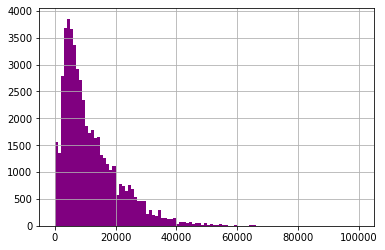

In [79]:
# Histograma precio
hist_price= df['price'].hist(grid=True,bins=100,range=(1,100000),color='purple')


El valor máximo del precio es de 375.000 por lo que es extremadamente atípico y por el momento ignoramos estos valores realmente grandes y nos centramos en los más razonables. Hasta un límite de 100.000 en el histograma vemos que la distribución de la frecuencia de los carros es mínima a partir de los 50.000 en adelante. 

La gran mayoría de carros se encuentra en un pico con precios entre un rango de 3.000 a 9.000, sería interesante conocer que si para este segmento de carros su precio se debe al modelo del año y a las condiciones en las que se encuentra. 

- Los años del vehículo cuando el anuncio se colocó

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen trabajo.
</div>

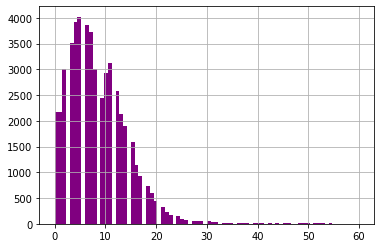

In [80]:
#Histograma años del vehículo cuando se coloco el anuncio
hist_years= df['years'].hist(grid=True,bins=80,range=(0,60),color='purple')


El histograma indica que los años del vehículo cuando se colocó el anuncio para la mayoría se concentra en un pico con 5 años y en promedio con el conjunto entero son de 8 años y medio. Adicional podemos ver que por ensima de 2000 carros se concentran hasta unos 15 años desde que se colocó el anuncio. 

Los datos atípicos que identicamos es que existen mínimos números de carros hasta con 110 años, esto corresponde tambien a los datos atípicos en el modelo del año que visualizamos anteriormente que son muy pocos carros clásicos los que se promocionan en el canal web. 

Con fines de representar los datos más significativos en el histograma pusimos como máximo 60 años y podemos ver que a partir de los 20 años ya se registran por debajo de los 500 carros.

- Millaje

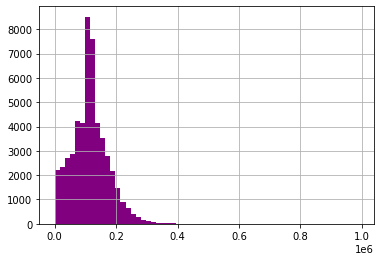

In [81]:
# Histograma millaje recorrido
hist_odometer= df['odometer'].hist(grid=True,bins=60,color='purple')


La distribución indica que tenemos picos en más de 5.000 carros con 100.000 y 120.000 aproximadamente de millas recorridas, por lo que la media nos indica que se encuentra en la mitad de ese rango. 

Por el contrario a partir de los 250.000 millas recorridas hay menos de 500 carros, esto se debe a que posiblemente tener carros con mayor a ese recorrido ya no sean considerados rentables para el negocio porque dificilmente se logren vender y no sean tan atractivos para los posibles compradores, a pesar de que contamos con carros hasta con un máximo recorrido de 990.000 millas.

- Número de cilindros

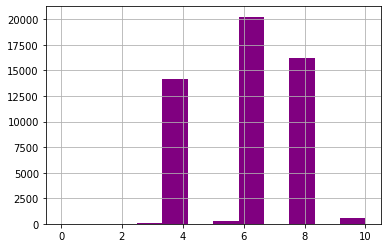

In [82]:
hist_cilindros= df['cylinders'].hist(grid=True,bins=12,range=(0,10),color='purple')

In [83]:
df['cylinders'].value_counts()

6     20257
8     16216
4     14193
10      551
5       272
3        34
12        2
Name: cylinders, dtype: int64

Los números de cilindros era una columna que teniamos valores ausentes originalmente y con su distribución en el histograma al principio se concentraban en un rango aproximadamente de 14.000 a 16.000 carros con 4, 6 y 8 cilindros

Después que hemos rellenado los valores ausentes podemos observar que en este histograma esos valores ausentes se distribuyeron en mayor cantidad a 6 cilindros llegando un pico a 20.000 carros. 

La media de cilindros es 6 y dado que tenemos un mínimo de 3 y máximo de 10 cilindros, no representan una amenaza de valores atípicos. 


In [84]:
pt_c= df.pivot_table(index=['transmission','cylinders'],values= 'model',aggfunc='count')
pt_c

model
transmission cylinders       
automatic    3             32
             4          12753
             5            249
             6          18340
             8          15297
             10           230
             12             1
manual       3              2
             4           1320
             5             23
             6            894
             8            546
             10            43
             12             1
other        4            120
             6           1023
             8            373
             10           278

En la tabla anterior podemos ver que el número de cilindros depende más del tipo de transmisión del carro. Por ejemplo es más común que para un carro automático y manual tengan 4, 6 y 8 cilindros, mientras que para la categoría de otros son 6,8 y 10 cilindros. 

- Condición


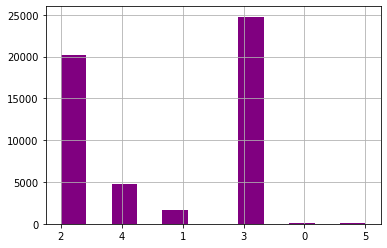

In [85]:
hist_condicion= df['condition'].hist(grid=True,bins=12,range=(0,5), color='purple')


En la variable númerica que hemos convertido a condición con valores desde 0 hasa 5 no representan valores atípicos, pero podemos aprovechar en el histograma para interpretar que la mayoría de carros se encuentran en estado excelente y justo.
Existen mínimos carros que son nuevos en los anuncios, por lo que este dato complementaría nuestro análisis del recorrido y los años desde el anuncio, ya que el negocio se enfoca en anunciar en la mayoría carros de hasta 15 años y con un recorrido en promedio de 115.000 millas.

Para concluir, analizamos que los valores atípicos distorcionan las métricas del conjunto de datos y que se van hacia los extremos superiores. En consencuencia para empezar con el análisis de los factores que influyen en el precio van a afectar los resultados y la idea es también reconocer esos segementos importantes en los datos que resulten más significativos. 

Sabemos que no vamos a contar con los datos 100% reales por el hecho que se reemplazaron los valores ausentes pero el objetivo es mantener la integridad y asegurar la mayor calidad de datos para los análisis que se derivarán en las tomas de decisiones del negocio.


## Estudiar y tratar valores atípicos



Los valores atípicos que identificamos en la sección anterior son: 
- Precio 
- Año desde la publicación 
- Millaje 

Realizaremos diagramas de cajas para identificar la concentración de datos que tenemos fuera de los rangos normales de valores. Para una mejor visualización cambiaremos la escala estableciendo límites en el eje Y para cortar los valores extremadamente atípicos.


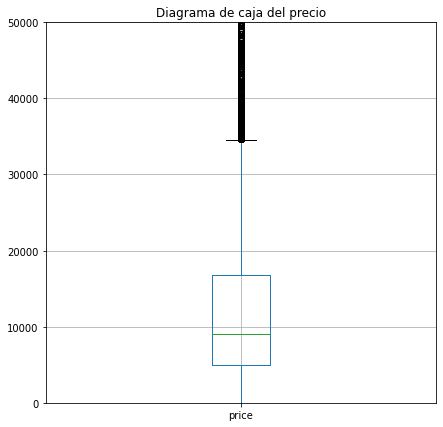

In [86]:
#
caja_precio=df['price'].plot(kind='box',figsize=(7,7), grid=True, ylim=(0,50000),title='Diagrama de caja del precio')


El 50% de los carros estan por debajo de los 9.000 y el otro 50% por encima, mientras que los valores atípicos empiezan a partir de los 35.000  

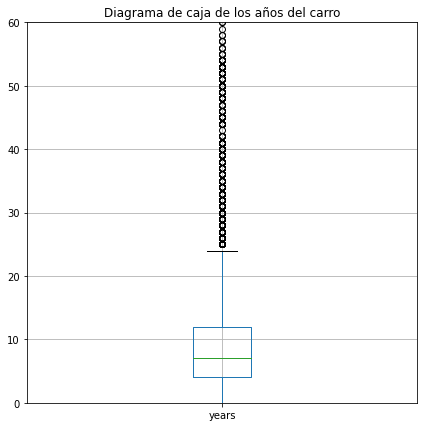

In [87]:
caja_año=df['years'].plot(kind='box',figsize=(7,7), grid=True, ylim=(0,60),title='Diagrama de caja de los años del carro')

El diagrama indica que hasta un 75% de los carros tiene 12 años desde que se publicó el anuncio y como límite para que sea considerado una valor típico son 24 años. Identificamos que a partir de los 25 años en adelante son valores atípicos. 

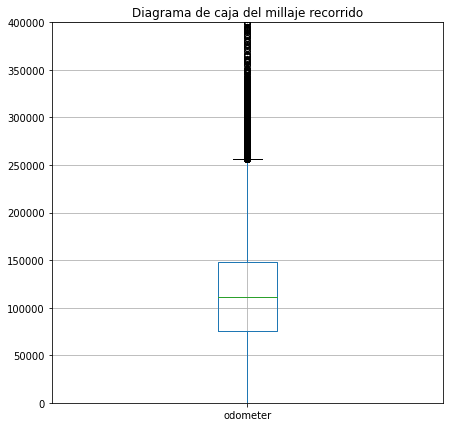

In [88]:
#
caja_odometer=df['odometer'].plot(kind='box',figsize=(7,7), grid=True, ylim=(0,400000),title='Diagrama de caja del millaje recorrido')


El 75% se concentra hasta los 150.000 millas recorridas y los valores atípicos nos indican que empiezan a partir de los 250.000 millas en adelante.

Finalmente aplicaremos un filtro sobre el DataFrame original para excluir estos valores atípicos identicados en las 3 columnas, lo cual nos servirá para poder crear nuevos histogramas y compararlos con los anteriores con valores atípicos para evaluar como cambian la distribución y por ende la interpretación. Para este proceso utilizaremos data slices a través del método query.

In [89]:
df_sin_vat= df.query('price < 35000 & years < 25 & odometer < 250000' )
df_sin_vat.tail(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,years,Promedio_recorrido
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,5,104171
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,16,152444
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,9,128057
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,5,104171
51524,6300,2014,nissan altima,2,4,gas,129000,automatic,sedan,others,False,2018-06-05,10,1,4,94459


Veremos cuantas filas tenemos en el DataFrame filtrado. 

In [90]:
df_sin_vat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48298 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               48298 non-null  int64         
 1   model_year          48298 non-null  int64         
 2   model               48298 non-null  object        
 3   condition           48298 non-null  object        
 4   cylinders           48298 non-null  int64         
 5   fuel                48298 non-null  object        
 6   odometer            48298 non-null  int64         
 7   transmission        48298 non-null  object        
 8   type                48298 non-null  object        
 9   paint_color         48298 non-null  object        
 10  is_4wd              48298 non-null  bool          
 11  date_posted         48298 non-null  datetime64[ns]
 12  days_listed         48298 non-null  int64         
 13  weekday             48298 non-null  int64     

## Estudiar parámetros principales sin valores atípicos

Utilizaremos los datos filtrados para crear nuevos histogramas para comparar con los histogramas anteriores (aquellos con los valores atípicos incluidos).

Primero crearemos 2 tablas dinámicas por separado e indicaremos la mediana de los valores para examinar su diferencia.

In [91]:
hist_odometer=df.pivot_table(index='model',values='odometer',aggfunc='median')
hist_odometer_sin_vat= df_sin_vat.pivot_table(index='model',values='odometer',aggfunc='median')

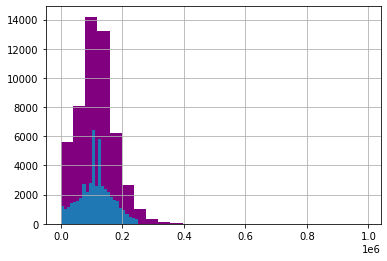

In [92]:
hist_odometer=df['odometer'].hist(grid=True,bins=25,color='purple')
hist_odometer_sin_vat= df_sin_vat['odometer'].hist(grid=True,bins=25)


Con el siguiente histograma podemos ver que la tendencia se mantiene en los picos entre 100.000 y 120.000 millas, pero la frecuencia se vio reducida grandemente por el filtro aplicado al DataFrame, y en el histograma azul ya no contiene carros con un millaje atipico mayor a 250.000 millas.

In [93]:
hist_price=df.pivot_table(index='model',values='price',aggfunc='median')
hist_price_sin_vat= df_sin_vat.pivot_table(index='model',values='price',aggfunc='median')

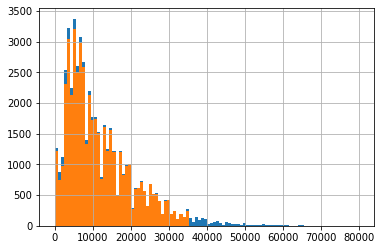

In [94]:
hist_price=df['price'].hist(grid=True,bins=100, range=(0,80000))
hist_price_sin_vat= df_sin_vat['price'].hist(grid=True,bins=100,range=(0,80000))


Podemos ver que una poca diferencia en la frecuencia de los precios de los carros, es decir que los datos filtrados en conjunto no afectaron en esta columna y podemos ver que sigue uniformemente el histograma con valores atipicos pero se limita hasta 35.000 de precio.

In [95]:
hist_years=df.pivot_table(index='model',values='years',aggfunc='median')
hist_years_sin_vat= df_sin_vat.pivot_table(index='model',values='years',aggfunc='median')

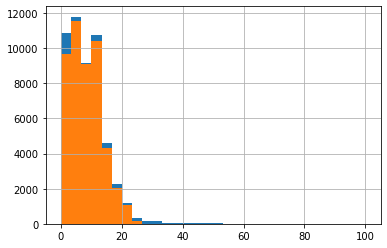

In [96]:
hist_price=df['years'].hist(grid=True,bins=30, range=(0,100))
hist_price_sin_vat= df_sin_vat['years'].hist(grid=True,bins=30,range=(0,100))

El histograma esta similar con una pequeña diferencia en las frecuencias, hasta un limite de 25 años en el histograma de color naranja. El pico se mantiene en 10 años aproximadamente seguido de 15 años.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen trabajo.
</div>

## Periodo de colocación de los anuncios



Estudiaremos cuántos días los anuncios fueron mostrados, como también estableceremos parámetros para determinar cuando se eliminaron rápidamente los anuncios, cuándo son publicados por un tiempo anormalmente largo y cuando son tiempos normales/habituales en función de los estadísticos.

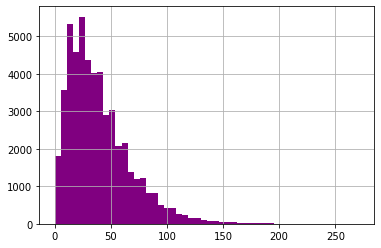

In [97]:
days_listed_hist=df['days_listed'].hist(grid=True, bins=50,color='purple')

Los días de los anuncios tienen un pico de aproximadamente 25 días y a medida que aumenten los días son menores los carros que se repiten, llegando hasta un maximo de 270 días lo cual es considerado un tiempo anormalmente largo. Podríamos deducir que mayormente pueden ser carros que no son muy atractivos ya sea por el modelo,tipo o precio y que fue más necesario extender esos días hasta que se logre comercializar o dar de baja. 

Por otro lado tambien tenemos días en que se eliminaron rapidamente los anuncios en menos de 5 días se estiman 2.000 carros, de igual manera pueden ser porque el modelo sea mayormente demandados y preferidos en el mercado y el precio sea conveniente.

A continuación calcularemos la media y la mediana a través de describe()

In [98]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Un 25% de todos los datos se encuentran con menos de 20 días y la media es de aproximandamente 40 días, es decir el doble de días que el Q1, pero se debe a que la media es mayor porque se desvía por los días anormalmente largos; por lo que consideraremos a la mediana como un estadístico más confiable con 33 días (1 mes) desde que el anuncio fue publicado hasta que fue eliminado como la métrica de un tiempo normal. 

A continuación agruparemos los días de los anuncios en rangos para conocer en detalle si hay diferencias entre las medias y medianas a través de una función. 

Para los días de anuncio nos basaremos en los estadísticos del diagrama de caja. Para Extremandamente cortos estableceremos como un límite hasta 9 días y los días muy largos como vimos el histograma empiezan una gran reducción a partir de los 53 días asi que estableceremos aquellos anuncion como anormalmente largos desde los 90 días en adelante. 

0- 9: extremadamente cortos 

10-19: cortos-normal

20-53: normal 

54-89: largo 

90-249: extremandamente largos 

In [99]:
def categoría_anuncio(row):
    
    if row >= 0 and row <=9:
        return 'Extremadamente cortos'
    elif row >= 10 and row <=19:
        return 'Cortos-Normal'
    elif row >= 20 and row <=53:
        return 'Normal'
    elif row >= 54 and row <=89:
        return 'Largos'
     
    else: 
        return 'Extremadamente Largos'


Comprobaremos el uso de la función llamando al índice 51 del DataFrame.

In [100]:
categoría_anuncio((df.loc[51,'days_listed']))

'Extremadamente Largos'

In [101]:
df['Categoría_anuncio'] =df['days_listed'].apply(categoría_anuncio)
days_g=df.groupby('Categoría_anuncio').agg({'days_listed':['mean','median','count']})
days_g

days_listed              
                             mean median  count
Categoría_anuncio                              
Cortos-Normal           14.642328     15   8916
Extremadamente Largos  113.153672    106   3091
Extremadamente cortos    5.913650      6   4586
Largos                  67.846027     66   9716
Normal                  34.558931     34  25216

<AxesSubplot:title={'center':'Mediana de los días de anuncio vs categoría'}, xlabel='Categoría_anuncio'>

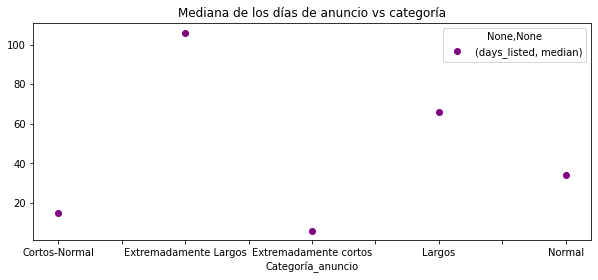

In [102]:
days_f=df.groupby('Categoría_anuncio').agg({'days_listed':['median']})
days_f.plot(style='o',figsize=(10,4),color='purple',title='Mediana de los días de anuncio vs categoría')

Conclusiones: 
- El periodo de días de duración de los anuncios normal son en un rango de 20 a 53 días. Estos valores corresponden a que este un poco por debajo de la mediana y hasta el Q3, con un total de 25.216 carros dentro de esta categoría que agrupa casi un 50% del conjunto de datos.

- Los días identificados dentro de una categoría general como cortos, lo subcategorizamos en los que son muy cortos de 0 a 9 días y los que son cortos con una cercanía a ser normales de 10 a 19 días, dando un total de carros igual al 25% del total del conjunto que coincide con el Q1.

- Los días que son largos igual fueron subcategorizados como largos a los días de anuncio desde los 54 hasta los 90 días y los muy largos que son mayores a 90 días. En ese grupo se concentran el 25 % del total de los carros. 



<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen trabajo.
</div>

## Precio promedio por cada tipo de vehículo

Analizaremos el número de anuncios publicados para cada tipo de vehículo y trazeremos un gráfico mostrando la dependecia de la cantidad de anuncios en cada tipo con esto podremos identificar para cuales tipos hay un mayor número de anuncios.

<AxesSubplot:title={'center':'Numero de anuncios por tipo de carro'}, xlabel='type'>

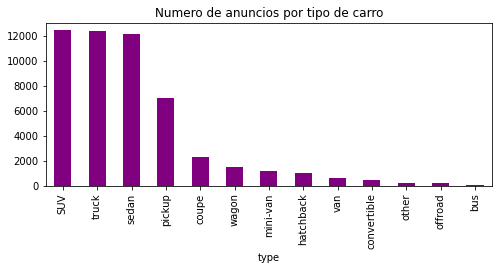

In [103]:
days_listed_pivot=df.pivot_table(index='type',values='days_listed',aggfunc='count')
v=days_listed_pivot['days_listed'].sort_values(ascending=False)
days_listed_pivot1=v.plot(kind='bar',figsize=(8,3), color='purple',title='Numero de anuncios por tipo de carro')
days_listed_pivot1

La distribución del número de anuncios por tipo de carro indica que para SUV y Truck son los 2 con mayores cantidades, posiblemente se deba a que son los más demandados y preferidos en el mercado y dentro del portafolio de productos del negocio sean los que dan una mayor rentabilidad.

Continuando veremos para estos 2 tipo de carros en que categoría de los anuncios se encuentran y conocer si sus mayores días de anuncios son largos o cortos

In [104]:
days_per_type=df.query('type == "SUV"').pivot_table(index=['Categoría_anuncio'], columns='type',values='days_listed',aggfunc=['count'])
days_per_type

,count
type,SUV
Categoría_anuncio,
Cortos-Normal,2084
Extremadamente Largos,768
Extremadamente cortos,1085
Largos,2339
Normal,6129


In [105]:
days_per_type=df.query('type == "truck"').pivot_table(index=['Categoría_anuncio'], columns='type',values='days_listed',aggfunc=['count'])
days_per_type

,count
type,truck
Categoría_anuncio,
Cortos-Normal,2205
Extremadamente Largos,702
Extremadamente cortos,1096
Largos,2407
Normal,5943


In [106]:
df['type'].value_counts()


SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

Los dos tipos de carros desde que se publican hasta que se elimina la publicación del anuncio en su mayoría son en tiempos normales que recordemos eran de 30 a 53 días y muy pocoslos tiempos son extremadamente largos.

También nos interesa conocer cual es el precio promedio por tipo de carro, para esto llamaremos al DataFrame filtrado sin valores atípicos para que no distorcionen los resultados.

<AxesSubplot:title={'center':'Precio promedio por tipo de carro'}, xlabel='type'>

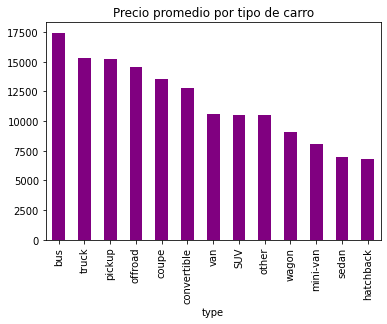

In [107]:
price_per_type_p=df_sin_vat.pivot_table(index='type',values='price',aggfunc='mean')
w=price_per_type_p['price'].sort_values(ascending=False)
w.plot(kind='bar',color='purple',title='Precio promedio por tipo de carro')

Los buses son los que tienen un precio promedio más alto que los demás cerca de los 17.500, pero son los que menos anuncios tienen por lo que se interpreta que no son tan rápido de comercializar que los otros tipos de carros que son para un público más abierto y no para conductores de buses.
El tipo truck tiene un precio promedio de 15.000, mientras que el SUV esta en 11.000 aproximadamente la diferencia son de 4.000 pero osbervamos que invierten la misma cantidad de anuncios para ambos. 
En resumen el precio promedio va a depender del tipo de carro.

Conclusiones: 
- Los 2 tipos de carros con mayores cantidades de anuncios son SUV y truck.
- Para la mayoría de estos tipos de carros sus días de anuncios se encuentran dentro del rango normal seguido de días extremadamente largos, posiblemente la explicación es que al ser los 2 productos estrellas con mayor foco en los anuncios si no se logra vender dentro del tiempo normal lo van a prolongar hasta que se logre la venta. 
- El precio promedio es más alto para los buses y son los que menos cantidad de anuncios tienen, esto se puede deber a que su portafolio se concentra mayormente en aquellos de tipo familiar y no tanto para otras funciones de transporte o carga.
- Los 2 tipo de carros SUV y track tienen precio promedio de 15.000 a 11.000 y son los que más se concentran en su portafolio de comercialización.

## Factores de precio

Para analizar que factores impactan más sobre el precio lo haremos en base a los tipos de carros más populares de la sección anterior, es decir SUV y truck.
De estos tipos de carros analizaremos si el precio depende de la: edad, millaje, condición, tipo de transmición y color. De estas variables categóricas que son: tipo de transmisión y color realizaremos diagramas de caja y para las variables númericas a través de diagramas de dispersión. 


- Precio y transmición por tipo de carro

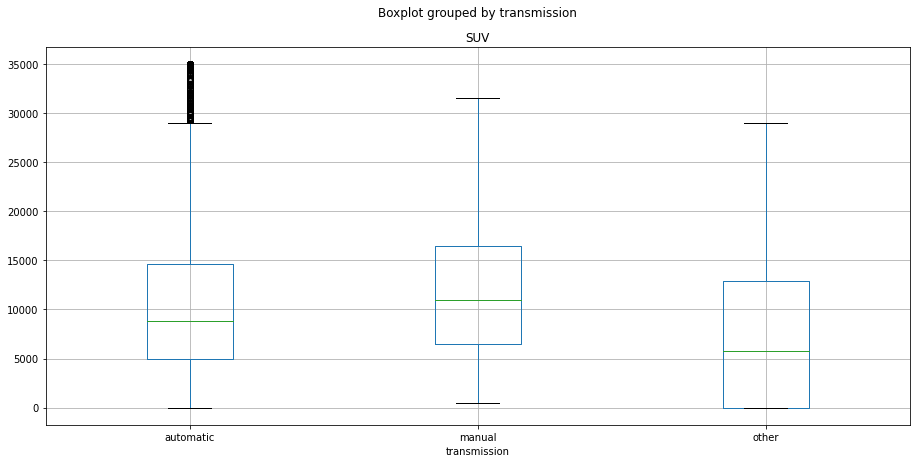

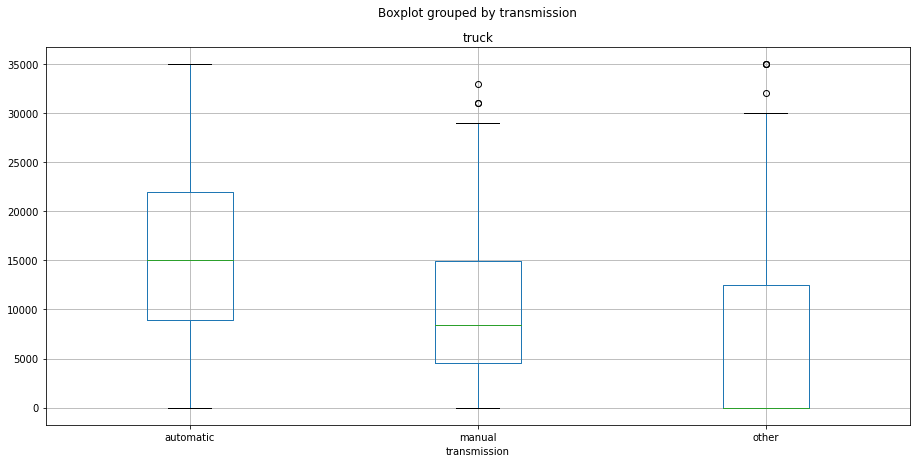

In [108]:
price_per_transmission= df_sin_vat.query('type ==("SUV","truck")').pivot_table(index='type',columns='transmission',values='price')
for tipo, datos in df_sin_vat.query('type ==("SUV","truck")').groupby("type"):
    datos.boxplot(by='transmission', column='price',figsize=(15,7))
    plt.title(tipo)
    plt.show()
    

Los tipos de carros más populares fueron: SUV y truck con los cuales trabajaremos de ahora en adelante. El estadístico que analizaremos será la mediana del precio por cada tipo de carro.

- SUV: La mediana del precio es mayor para los carros manuales con un precio de 10.000 y para automáticos 9.000 y otros por ensima de 5.000. 

- truck: Hay diferencias marcadas, el automatico alcanza el mayor valor de precio de 15.000, los manuales por debajo de los 10.000 y los otros tienen un precio de 0.



En resumen se puede concluir que los precios van a variar dependiendo del tipo de carro y también si es de trasmisión automático, manual y otros, ya que para los SUV los manuales son lo de un precio mediano más alto, y para los trcuk lo son los automáticos.


- Precio y color por tipo de carro

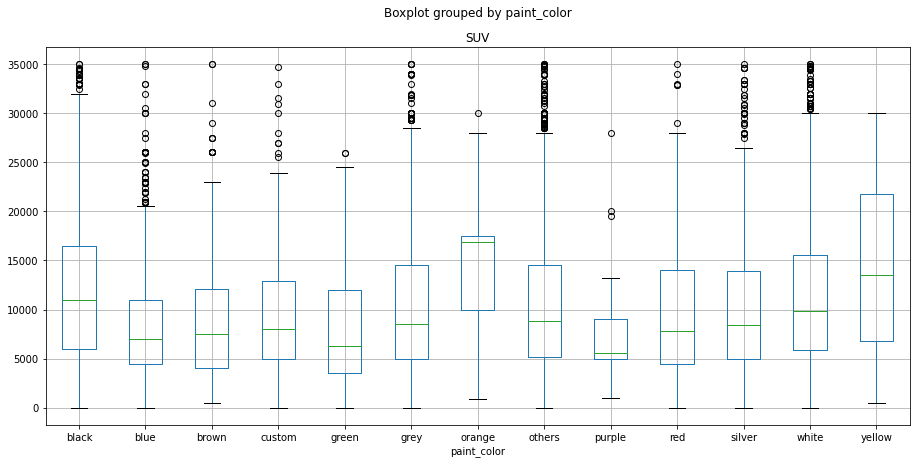

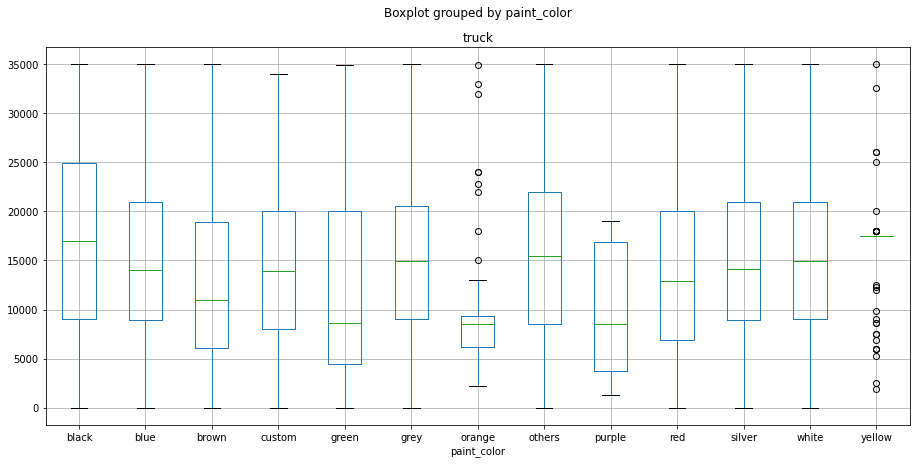

In [109]:
price_per_color= df_sin_vat.query('type ==("SUV","truck")').pivot_table(index='type',columns='paint_color',values='price')
for tipo, datos in df_sin_vat.query('type ==("SUV","truck")').groupby("type"):
    datos.boxplot(by='paint_color', column='price',figsize=(15,7))
    plt.title(tipo)
    plt.show()
    

Los precios por los tipos de carro se analizaran si depende de cual color es el mas costoso y cual el de menor valor

- SUV: El color naranja es el más costoso y el de menor valor es el morado. Los precios por color en general es poca la diferencia. 

- truck: El color negro es el más costoso y el de menor valor es el morado y el naranja. Existe una variación media en los precios según los colores.   

    
En resumen el precio va a variar dependiendo del tipo de carro por cada color, para los dos tipos vemos que existen variabilidades en el precio mediano por cada color.

- Precio y edad por tipo de carro

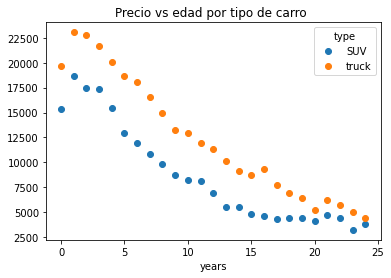

In [110]:
price_per_years= df_sin_vat.query('type ==("SUV","truck")').pivot_table(index='years',columns='type',values='price')
price_per_years.plot(style='o',title='Precio vs edad por tipo de carro ')
plt.show()

Hay una relación inversamente proporcional entre el número de años del carro y el precio del mismo. 
A medida que los años aumentan el precio se disminuye teniendo una tendencia a ser lineal, pero a partir de los 21 años en adelante los precio tienen la tendecia a decrecer el precio mas inclinado.

Podemos ver graficamente que el precio del truck es más costoso que el SUV la brecha de precios se mantine aproxiamdamente igual, pero a medida que llegan a los 20 años se van acercando las curvas y en los 24 años sus precios son muy similares.

- Precio y millaje por tipo de carro

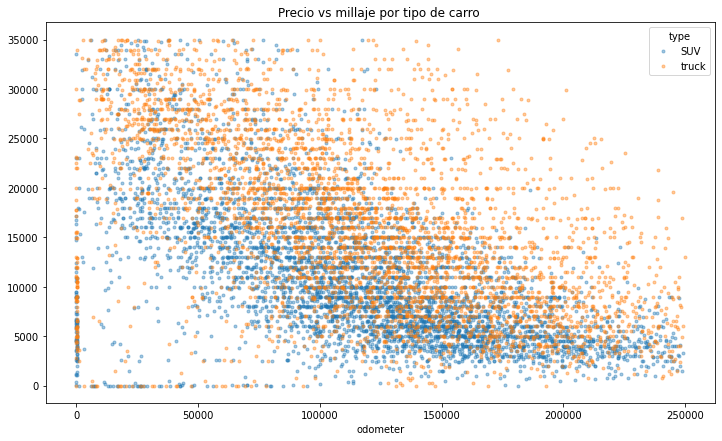

In [111]:
price_per_years= df_sin_vat.query('type ==("truck","SUV")').pivot_table(index='odometer',columns='type',values='price')
price_per_years.plot(style='o',title='Precio vs millaje por tipo de carro ',figsize=(12,7), ms=3,alpha=0.4)
plt.show()

Este tipo de gráfica tiene la tendencia a ser una escala logarítmica ya que comienzan sus valores máximos en el precio y a medida que aumenta el millaje recorrido del carro el precio tiende a disminuir pero no de manera lineal sino en una forma de curva. Podemos observar que a partir de los 150.000 millas en adelante comienza a ser una línea hortizontal constante y con esto se concluye que es una relación inversamente proporcional en estas 2 variables. Tambien se observa que tenemos valores que no siguen la tendencia de la curv, pero la mayoría si cumple con esta observación.

- Precio y condición por tipo de carro

<AxesSubplot:title={'center':'Precio y condición por tipo de carro'}, xlabel='condition'>

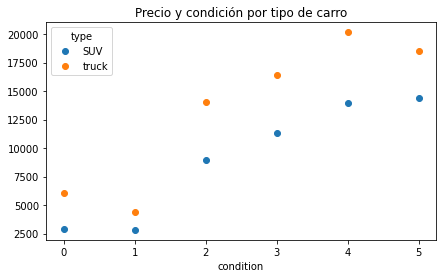

In [112]:
price_per_condition =df_sin_vat.query('type ==("SUV","truck")').pivot_table(index='condition',columns='type',values='price')
price_per_condition.plot(style='o',figsize=(7,4),title='Precio y condición por tipo de carro')

La gráfica en general indica que hay una tendencia a ser lineal con una relación a ser directamente proporcional entre la condición del carro y el precio. 
Este principio obedece que si el carro se encuentra en mejores condiciones su precio incrementará. 
De igual manera podemos ver casos en que para el truck el precio es menor cuando el carro se encuentra en condicion 1 que cuando estaba en condicion 0, adicional que el precio maximo es cuando el carro tiene condicion de 4 y disminuye cuando la condicion cambia a 5. Esta interpretación podría complementarse si ya depende más con que propósito comerciales se vende en esas condiciones para el uso del consumidor.

Por el contrario para el carro tipo SUV el precio entre la condicion 0 y 1 parece ser similar y no existe una diferencia significativa, y alcanza su precio máximo cuando la condición es 5.

Finalmente incorporaremos una matriz y diagramas de correlación para observar para cada tipo de carro más popular.

-Truck

            model_year  odometer     price     years
model_year    1.000000 -0.580681  0.566937 -0.998667
odometer     -0.580681  1.000000 -0.376106  0.570942
price         0.566937 -0.376106  1.000000 -0.564394
years        -0.998667  0.570942 -0.564394  1.000000


array([[<AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='odometer', ylabel='model_year'>,
        <AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='years', ylabel='model_year'>],
       [<AxesSubplot:xlabel='model_year', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='years', ylabel='odometer'>],
       [<AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='years', ylabel='price'>],
       [<AxesSubplot:xlabel='model_year', ylabel='years'>,
        <AxesSubplot:xlabel='odometer', ylabel='years'>,
        <AxesSubplot:xlabel='price', ylabel='years'>,
        <AxesSubplot:xlabel='years', ylabel='years'>]], dtype=object)

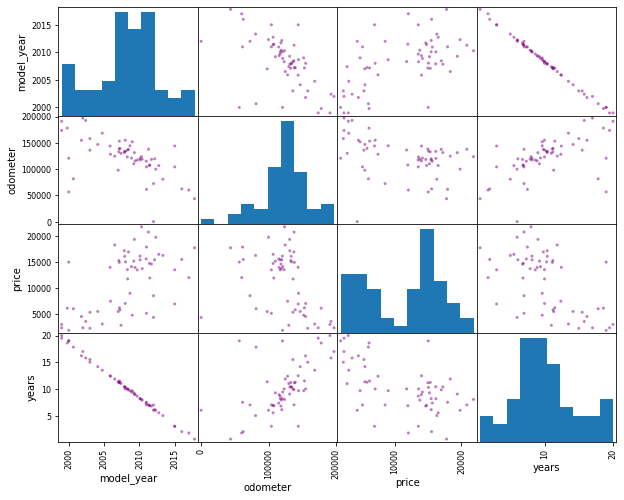

In [113]:
matrix1=df_sin_vat.query('type ==("truck")').pivot_table(index='model',values=['price','years','odometer','model_year'], aggfunc='mean')
print(matrix1.corr())
pd.plotting.scatter_matrix(matrix1,figsize=(10,8), color='purple')

-SUV

            model_year  odometer     price     years
model_year    1.000000 -0.442572  0.335342 -0.997890
odometer     -0.442572  1.000000 -0.137075  0.445213
price         0.335342 -0.137075  1.000000 -0.324888
years        -0.997890  0.445213 -0.324888  1.000000


array([[<AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='odometer', ylabel='model_year'>,
        <AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='years', ylabel='model_year'>],
       [<AxesSubplot:xlabel='model_year', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='years', ylabel='odometer'>],
       [<AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='years', ylabel='price'>],
       [<AxesSubplot:xlabel='model_year', ylabel='years'>,
        <AxesSubplot:xlabel='odometer', ylabel='years'>,
        <AxesSubplot:xlabel='price', ylabel='years'>,
        <AxesSubplot:xlabel='years', ylabel='years'>]], dtype=object)

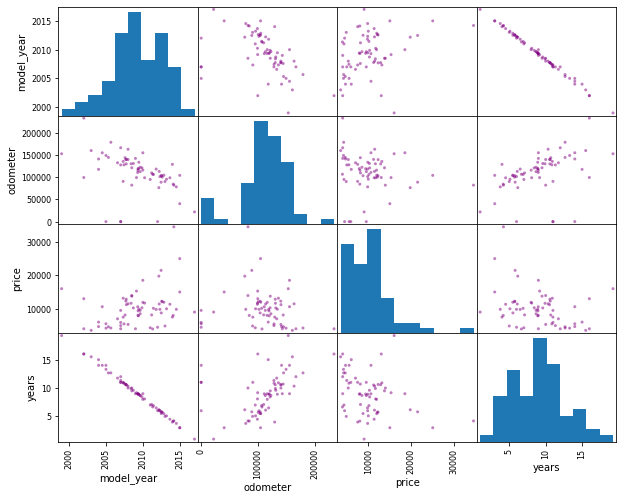

In [114]:
matrix1=df_sin_vat.query('type ==("SUV")').pivot_table(index='model',values=['price','years','odometer','model_year'], aggfunc='mean')
print(matrix1.corr())
pd.plotting.scatter_matrix(matrix1,figsize=(10,8), color='purple')

- Precio y model year: Para ambos tipos de carros hay una correlación positiva, de manera general obedece que si el modelo del carro es mas nuevo el precio aumentará.  Para truck la correlación es más fuerte que SUV, y podemos ver en el grafico que para truck los valores estan mas dispersos entre los precios, mientras que en SUV se observa una agrupación en los precios entre 10.000
- Precio y years: Existe una correlación perfecta inversamente proporcional entre model_year y años dado que se aplicó una operación aritmética. 
- Precio y odometer: La relación entre ambas variables es negativa, pero para el tipo truck es más fuerte, por lo general para ambos tipos los valores del odometer que esten muy distantes se va a cumplir este principio de la diferencia entre precios. 
- Odometer y model year: La correlacion negativa es mas fuerte para los carros tipos truck en este los valores del recorrido estan mas distantes mientras que en SUV sus valores de recorrido se encuentran más agrupados.
-Odometer y years: La correlación es positiva ya que a medida que aumentan los años del vehículo su recorrido va a ser mayor por el uso del carro.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Excelente trabajo en esta sección, Sara.
</div>

## Conclusión general



- El DataFrame original contenía 5 columnas con valores ausentes: is_4wd,cylinders,odometer,model_year y paint_color, los cuales fueron imputados sus valores ausentes con estadísticos de la moda y mediana a partir de la creación de gráficos de dispersión para estudiar si existía patrones con el resto de las variables y definir las condiciones para el relleno a través del uso de funciones. 
- No se encontraron valores duplicados después de realizar la imputación de las 5 columnas, se corrigieron los tipos de datos y se enriqueció la información para tener mayor detalle que resultaría en un mayor análisis y evaluación de los factores.
- Hubieron datos atípicos en el precio, recorrido, años del carro y en los dias de la publicacion del anuncio. Para eso se procedió a filtrar el DataFrame original y guardarlo en otra variable para la comparación gráfica a través de histogramas con los datos que no tenían valores atípicos, esto nos srivio para demostrar como afectaban en la distribución y en los estadísticos sobretodo en la media.
- Los días de publicación de los anuncios se identificaron en 4 grupos para clasificar si eran tiempos anormalmente muy cortos y muy largos en función a los estadísticos obtenidos en el diagrama de caja.
- Los tipos de carros que más cantidades de anuncios tenían fueron: SUV y track considerados los productos estrellas y se identificaron que sus días de anuncio correspondían a un rango normal. 
- Finalmente se estudiaron los parámetros que pueden influenciar en el precio y se comprobó que los años del carro, el color y millaje recorrido y el tipo de transmición si afecta a que el precio sea diferente según estas condiciones para los tipos de carros más populares.

<div class="alert alert-block alert-danger">
 
# Comentarios generales I
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Hola, Sara. Debemos trabajar en esta sección para poder continuar ya que la manipulación de los datos puede afectar considerablemente las conclusiones obtenidas más adelante. Los puntos son:
 
1. `is_4wd` debe ser booleano.
2. Sería mejor crear una nueva categoría para `paint_color`. 
3. Emplea un estadístico más apropiado para `cylinders`.
4. Emplea un estadístico más apropiado para `odometer`.
5. Revisa las conclusiones del resto del documento cuando se hayan hecho las correcciones pertinentes.
    
Una vez esto sea corregido, proseguiremos con la evaluación del resto del documento.
 </div>

<div class="alert alert-block alert-danger">
 
# Comentarios generales II
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien, Sara. El problema de los datos ausentes en la primera sección ha sido corregido satisfactoriamente pero hemos de trabajar en algunos puntos de la sección posterior:
 
1. Debes corregir el cálculo del millaje promedio.
    
2. Tus gráficos conservan información errónea sobre las variables anteriormente corregidas. Actualízalas.
    
3. En la última sección debes concentrarte en los dos tipos de vehículos más populares.
    
Una vez esto sea corregido, proseguiremos con la evaluación del resto del documento.
 </div>

<div class="alert alert-block alert-warning">
 
# Comentarios generales III
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Gran trabajo, Sara! Solo nos queda un punto por corregir en la sección para calcular el millaje promedio por año. No se debe agrupar. Tienes que calcular el millaje promedio para cada vehículo. Te he dejado una sugerencia en esa sección.
    
Una vez esto sea corregido, el proyecto será aprobado. No olvides revisar el posible cambio en las conclusiones.
 </div>

<div class="alert alert-block alert-success">
 
# Comentarios generales IV
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Buen trabajo, Sara! Has aprobado tu tercer proyecto. Un paso más en el camino hacia el universo de los datos.

¡Felicitaciones! Sigue así, vas por muy buen camino.
 </div>